## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
# Data Load
demo = pd.read_csv('data/LPOINT_BIG_COMP_01_DEMO.csv', low_memory=False)
pdde = pd.read_csv('data/LPOINT_BIG_COMP_02_PDDE.csv', low_memory=False)
cop = pd.read_csv('data/LPOINT_BIG_COMP_03_COP_U.csv', low_memory=False)
clac = pd.read_csv('data/LPOINT_BIG_COMP_04_PD_CLAC.csv', low_memory=False)
br = pd.read_csv('data/LPOINT_BIG_COMP_05_BR.csv', low_memory=False)
lpay = pd.read_csv('data/LPOINT_BIG_COMP_06_LPAY.csv', low_memory=False)

In [3]:
# Column명 변경
demo.columns = ['고객번호', '성별', '연령대', '거주지대분류코드']
pdde.columns = ['고객번호', '영수증번호', '채널구분', '제휴사', '점포코드', '상품코드', '구매일자', '구매시간', '구매금액', '구매수량']
cop.columns = ['고객번호', '영수증번호', '제휴사', '점포코드', '채널구분', '이용일자', '방문일자', '이용시간', '이용금액']
clac.columns = ['상품코드', '소분류명', '대분류명', '중분류명']
br.columns = ['점포코드', '제휴사', '점포대분류코드', '점포중분류코드']
lpay.columns = ['고객번호', '영수증번호', '제휴사', '채널구분', '이용일자', '이용시간', '이용금액']

### [1. demo]: Demo

In [55]:
demo

,고객번호,성별,연령대,거주지대분류코드
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


In [18]:
demo.isna().sum()

cust         0
ma_fem_dv    0
ages         0
zon_hlv      0
dtype: int64

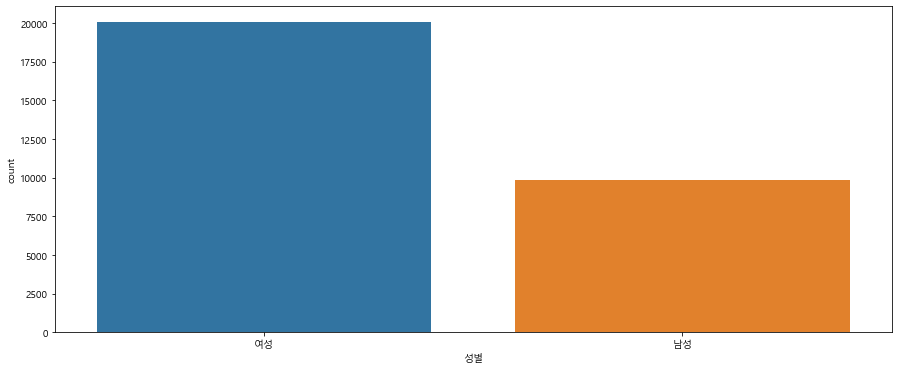

In [57]:
# 성별
plt.figure(figsize = (15, 6))
sns.countplot(x='성별', data=demo)
plt.show()

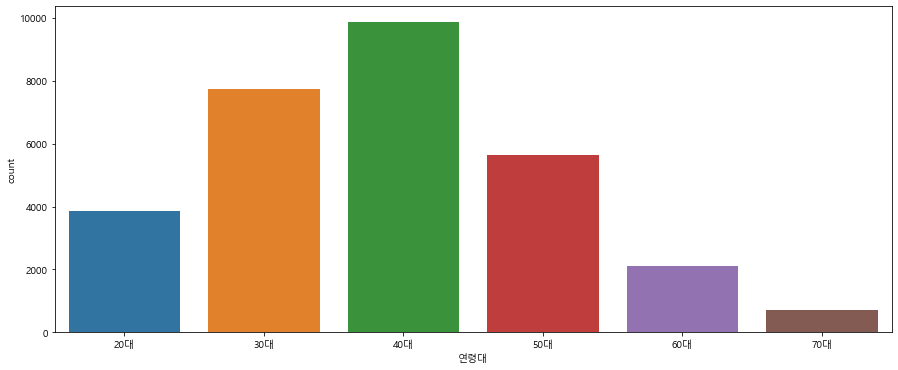

In [59]:
# 연령대
age_order = ['20대', '30대', '40대', '50대', '60대', '70대']

plt.figure(figsize = (15, 6))
sns.countplot(x='연령대', data=demo, order=age_order)
plt.show()

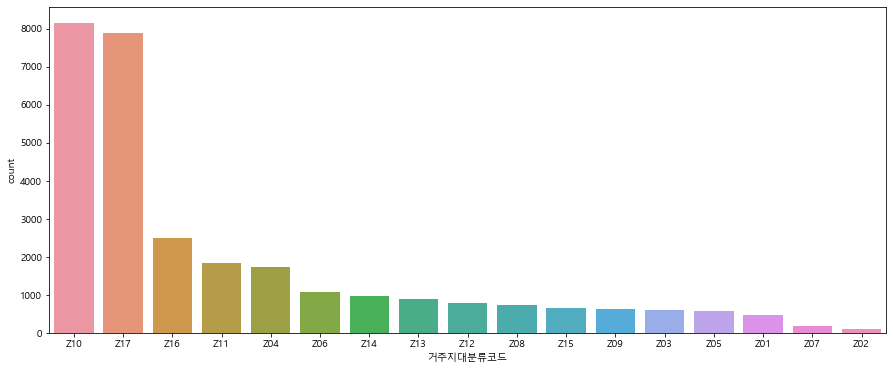

In [71]:
# 거주지
plt.figure(figsize = (15, 6))
sns.countplot(x='거주지대분류코드', data=demo, order=demo['거주지대분류코드'].value_counts().index)
plt.show()

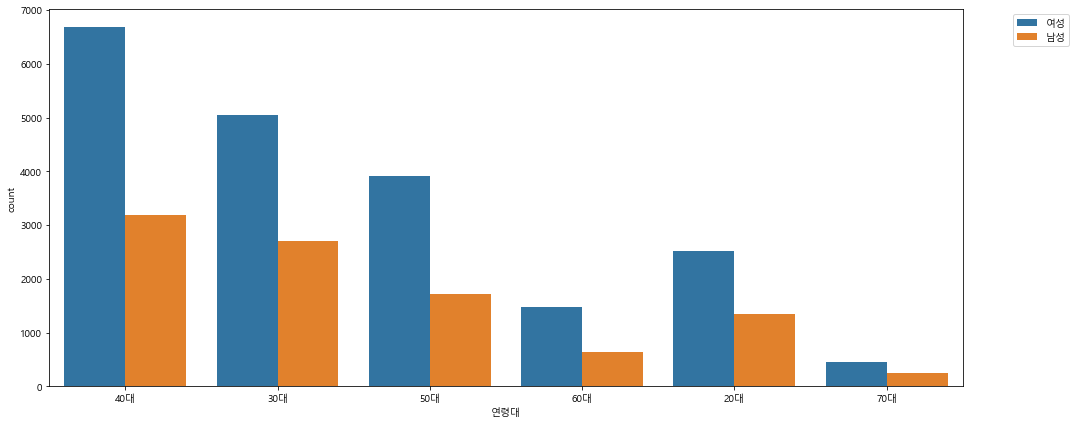

In [63]:
# 연령대별 성별 
plt.figure(figsize = (15, 6))
sns.countplot(x='연령대', hue='성별', data=demo)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

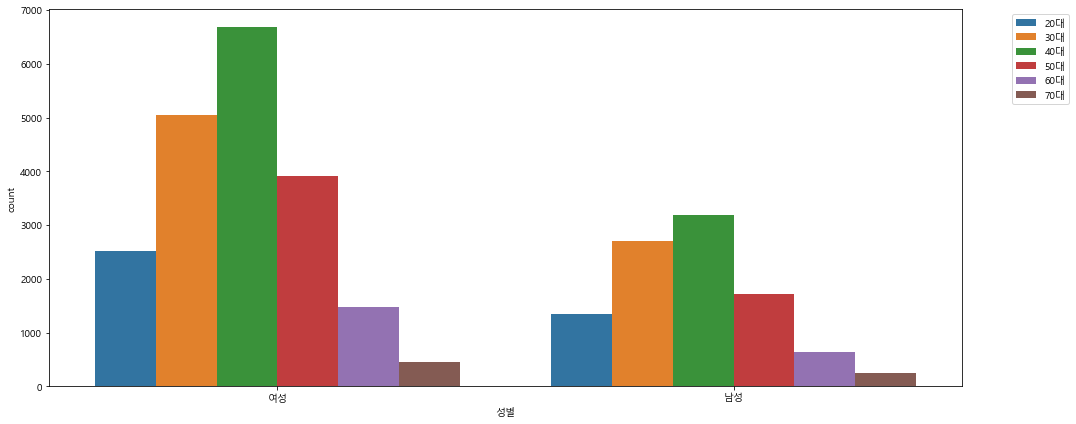

In [65]:
# 성별별 연령대
age_order = ['20대', '30대', '40대', '50대', '60대', '70대']

plt.figure(figsize = (15, 6))
sns.countplot(x='성별', hue='연령대', hue_order=age_order, data=demo)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [66]:
# 연령대별 성별 비율
xtab_col = pd.crosstab(demo['성별'], demo['연령대'], margins=True, normalize = 'columns')
xtab_col

연령대,20대,30대,40대,50대,60대,70대,All
성별,,,,,,,
남성,0.347781,0.348501,0.323127,0.304988,0.300709,0.354839,0.32862
여성,0.652219,0.651499,0.676873,0.695012,0.699291,0.645161,0.67138


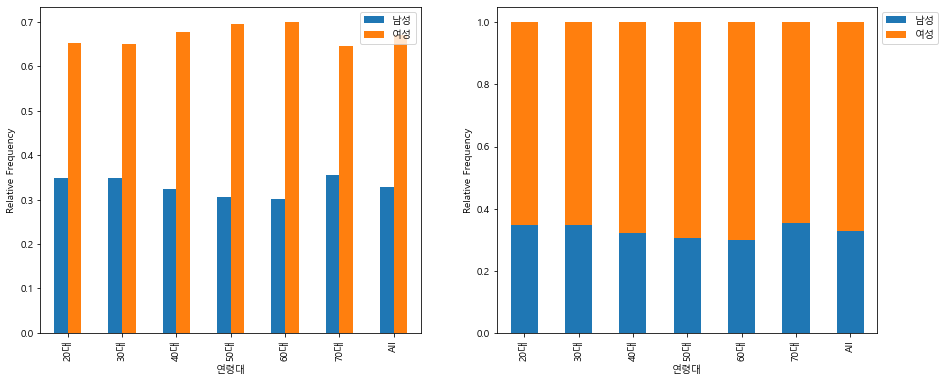

In [68]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

xtab_col.T.plot.bar(ax = axes[0], legend=False, ylabel = 'Relative Frequency')
xtab_col.T.plot.bar(stacked = True, ax = axes[1], ylabel = 'Relative Frequency') #stacked = True
axes[0].legend(bbox_to_anchor=(1.0, 1.0), loc='upper right')
axes[1].legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [72]:
# 성별별 연령대 비율
xtab_col = pd.crosstab(demo['연령대'], demo['성별'], margins=True, normalize = 'columns')
xtab_col

성별,남성,여성,All
연령대,,,
20대,0.136317,0.125131,0.128807
30대,0.274262,0.250959,0.258617
40대,0.324212,0.332420,0.329723
50대,0.174771,0.194941,0.188313
60대,0.064700,0.073644,0.070705
70대,0.025738,0.022905,0.023836


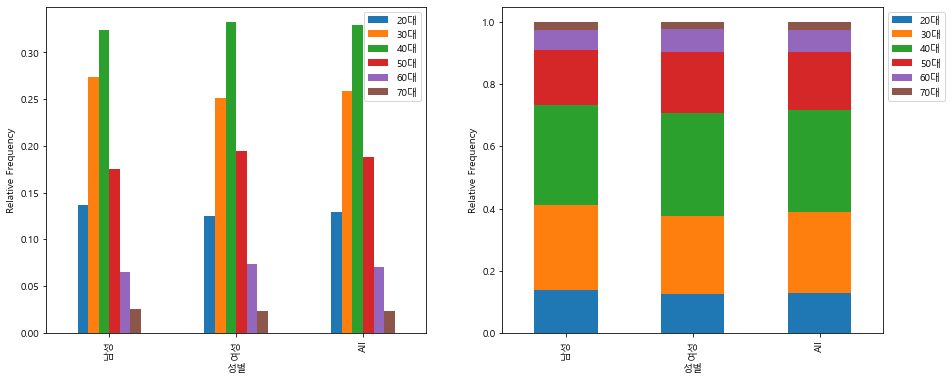

In [73]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

xtab_col.T.plot.bar(ax = axes[0], legend=False, ylabel = 'Relative Frequency')
xtab_col.T.plot.bar(stacked = True, ax = axes[1], ylabel = 'Relative Frequency') #stacked = True
axes[0].legend(bbox_to_anchor=(1.0, 1.0), loc='upper right')
axes[1].legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### [2. pdde]: 상품 구매 정보

In [77]:
pdde

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [78]:
pdde.isna().sum()

고객번호          0
영수증번호         0
채널구분          0
제휴사           0
점포코드     428501
상품코드          0
구매일자          0
구매시간          0
구매금액          0
구매수량          0
dtype: int64

In [90]:
# 구매일자별 총구매액
# 주말 구매가 상위권

pdde.groupby('구매일자')['구매금액'].sum().sort_values(ascending=False).head(10)

구매일자
20210220    631883357.0
20210502    598833708.0
20210221    581804834.0
20210501    581096064.0
20211127    578869805.0
20211106    569993200.0
20210306    569880177.0
20211107    535477118.0
20210515    530835497.0
20210910    527157495.0
Name: 구매금액, dtype: float64

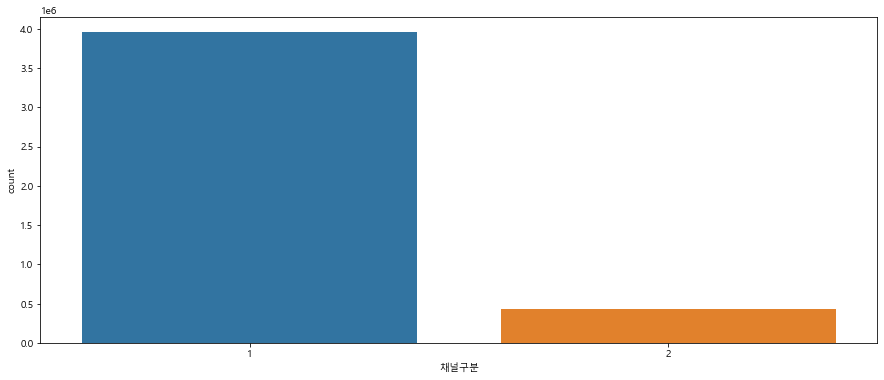

In [97]:
# 채널구분
# 오프라인이 온라인보다 높음

plt.figure(figsize = (15, 6))
sns.countplot(x='채널구분', data=pdde)
plt.show()

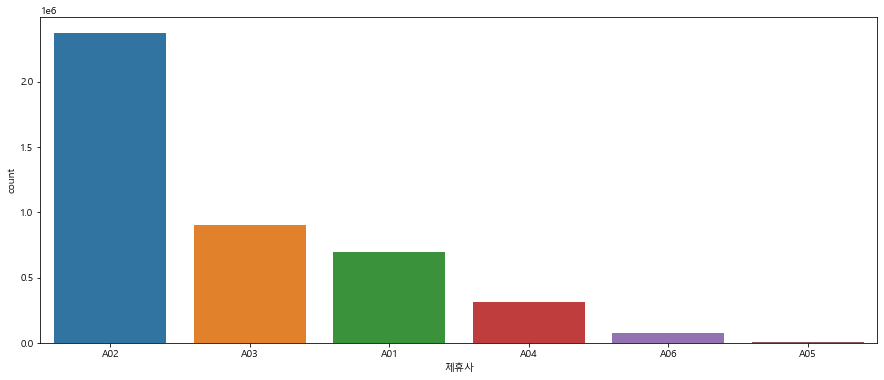

In [99]:
# 제휴사

plt.figure(figsize = (15, 6))
sns.countplot(x='제휴사', data=pdde, order=pdde['제휴사'].value_counts().index)
plt.show()

In [4]:
pdde.head()

,고객번호,영수증번호,채널구분,제휴사,점포코드,상품코드,구매일자,구매시간,구매금액,구매수량
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


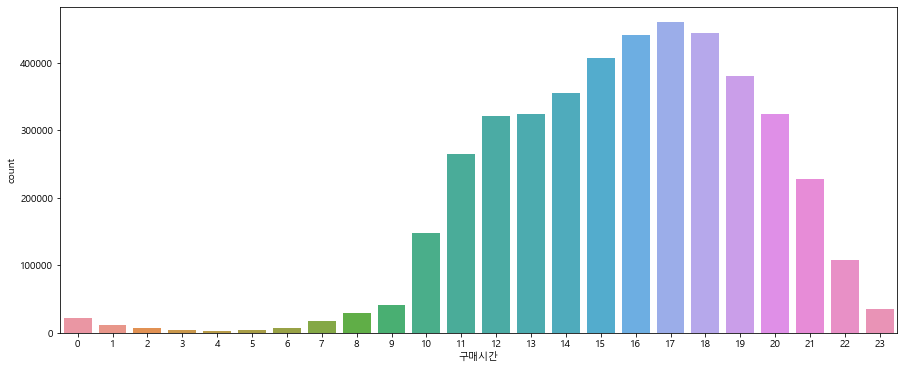

In [5]:
# 구매시간

plt.figure(figsize = (15, 6))
sns.countplot(x='구매시간', data=pdde)
plt.show()

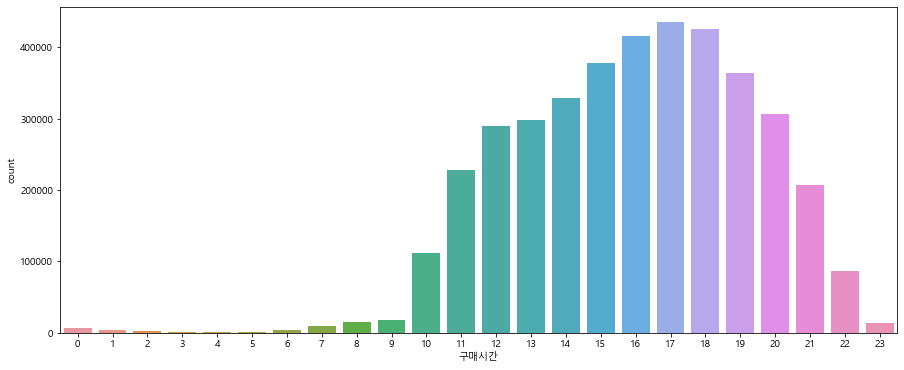

In [6]:
# 오프라인 구매시간

plt.figure(figsize = (15, 6))
sns.countplot(x='구매시간', data=pdde[pdde['채널구분']==1])
plt.show()

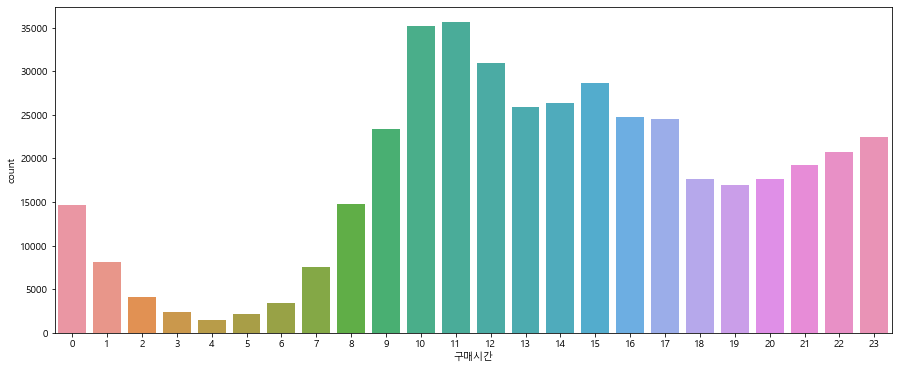

In [7]:
# 온라인 구매시간

plt.figure(figsize = (15, 6))
sns.countplot(x='구매시간', data=pdde[pdde['채널구분']==2])
plt.show()

### [3. cop]: 제휴사 이용 정보

In [75]:
cop

,고객번호,영수증번호,제휴사,점포코드,채널구분,이용일자,방문일자,이용시간,이용금액
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


In [76]:
cop.isna().sum()

고객번호      0
영수증번호     0
제휴사       0
점포코드     55
채널구분      0
이용일자      0
방문일자      0
이용시간      0
이용금액      0
dtype: int64

### [4. clac]: 상품 분류 정보

In [8]:
clac

,상품코드,소분류명,대분류명,중분류명
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [9]:
clac.isna().sum()

상품코드    0
소분류명    0
대분류명    0
중분류명    0
dtype: int64

In [12]:
clac.groupby('대분류명')['상품코드'].count().sort_values(ascending=False).head(10)

대분류명
패션잡화         130
축산물           91
수산물           88
스포츠패션         82
문구/사무용품       72
채소            72
유아동의류         67
과일            58
속옷/양말/홈웨어     56
조미료           51
Name: 상품코드, dtype: int64

### [5. br]: 점포 정보

In [13]:
br

,점포코드,제휴사,점포대분류코드,점포중분류코드
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


In [14]:
br.isna().sum()

점포코드       0
제휴사        0
점포대분류코드    0
점포중분류코드    0
dtype: int64

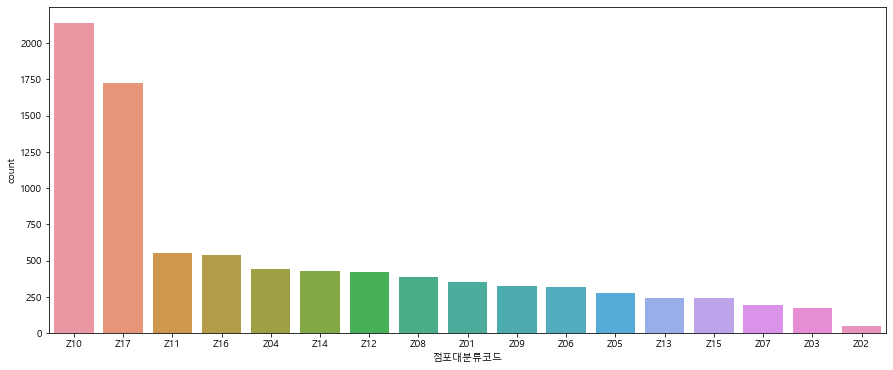

In [17]:
# 점포대분류코드

plt.figure(figsize = (15, 6))
sns.countplot(x='점포대분류코드', data=br, order=br['점포대분류코드'].value_counts().index)
plt.show()

### [6. lpay]: 엘페이 이용

In [18]:
lpay

,고객번호,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500
...,...,...,...,...,...,...,...
353179,M470112503,210125110644545,A06,2,20210125,11,51800
353180,M470112503,210104210652271,A06,2,20210104,21,6440
353181,M748878049,210119200278240,A02,1,20210119,20,17600
353182,M748878049,210119180267206,A02,1,20210119,18,12400


In [19]:
lpay.isna().sum()

고객번호     0
영수증번호    0
제휴사      0
채널구분     0
이용일자     0
이용시간     0
이용금액     0
dtype: int64

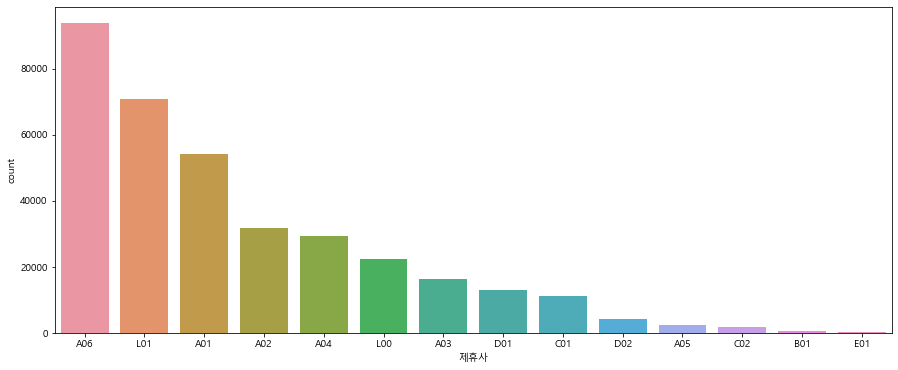

In [20]:
# 제휴사
# 유통사 - 비제휴사
# 숙박, 렌탈 사용 별로 없음

plt.figure(figsize = (15, 6))
sns.countplot(x='제휴사', data=lpay, order=lpay['제휴사'].value_counts().index)
plt.show()